In [1]:
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(scales)
library(repr)
library(stargazer)
library(gridExtra)
options(repr.plot.width=10, repr.plot.height=10)
source('~/covid_mobility/paper_code/utils/adjacency_and_cluster_robust_inference.R')
source('~/covid_mobility/paper_code/utils/residualizer+genAlters.R')
source('~/covid_mobility/paper_code/utils/labels_and_colors.r')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/social_adj_matrix.RData')
# load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_v2.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/conley_selector_matrix.Rdata')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/ivLassoModel.Rdata')
# panel <- readRDS('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_v2.RData')
panel = readRDS('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_ego_alter_interactions.RData')
setwd('/home/yiqunc/covid_fb_personal_folder/robustness_check_results/')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching packa

In [2]:
weather_rc1 <- felm(ash_rnstu.r ~ 
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_rnstu.r ~ alter_prcp10.r + alter_prcp11.r + alter_prcp12.r + alter_prcp13.r + alter_prcp14.r + 
                        alter_prcp15.r + alter_prcp16.r + alter_prcp17.r + alter_prcp18.r + alter_prcp19.r + alter_prcp20.r +
                        alter_tmax02.r + alter_tmax03.r + alter_tmax04.r + alter_tmax05.r + alter_tmax06.r +alter_tmax07.r + 
                        alter_tmax08.r + alter_tmax09.r + alter_tmax10.r + alter_tmax11.r + alter_tmax12.r + alter_tmax13.r + 
                        alter_tmax14.r + alter_tmax15.r + alter_tmax16.r + alter_tmax17.r + alter_tmax18.r + alter_tmax19.r + 
                        alter_tmax20.r) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

sum.weather_rc1 <- summarize.felm.fit.with.adj(weather_rc1, conley.selector.matrix, panel$state_abbv)
sum.weather_rc1$ct

weather_rc2 <- felm(fb_btvrc.r ~ 
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (alter_btvrc.r ~ alter_prcp10.r + alter_prcp11.r + alter_prcp12.r + alter_prcp13.r + alter_prcp14.r + 
                        alter_prcp15.r + alter_prcp16.r + alter_prcp17.r + alter_prcp18.r + alter_prcp19.r + alter_prcp20.r +
                        alter_tmax02.r + alter_tmax03.r + alter_tmax04.r + alter_tmax05.r + alter_tmax06.r +alter_tmax07.r + 
                        alter_tmax08.r + alter_tmax09.r + alter_tmax10.r + alter_tmax11.r + alter_tmax12.r + alter_tmax13.r + 
                        alter_tmax14.r + alter_tmax15.r + alter_tmax16.r + alter_tmax17.r + alter_tmax18.r + alter_tmax19.r + 
                        alter_tmax20.r) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

sum.weather_rc2 <- summarize.felm.fit.with.adj(weather_rc2, conley.selector.matrix, panel$state_abbv)
sum.weather_rc2$ct

weather_rc3 <- felm(ash_nhd.r ~ 
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_nhd.r ~ alter_prcp10.r + alter_prcp11.r + alter_prcp12.r + alter_prcp13.r + alter_prcp14.r + 
                        alter_prcp15.r + alter_prcp16.r + alter_prcp17.r + alter_prcp18.r + alter_prcp19.r + alter_prcp20.r +
                        alter_tmax02.r + alter_tmax03.r + alter_tmax04.r + alter_tmax05.r + alter_tmax06.r +alter_tmax07.r + 
                        alter_tmax08.r + alter_tmax09.r + alter_tmax10.r + alter_tmax11.r + alter_tmax12.r + alter_tmax13.r + 
                        alter_tmax14.r + alter_tmax15.r + alter_tmax16.r + alter_tmax17.r + alter_tmax18.r + alter_tmax19.r + 
                        alter_tmax20.r) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

sum.weather_rc3 <- summarize.felm.fit.with.adj(weather_rc3, conley.selector.matrix, panel$state_abbv)
sum.weather_rc3$ct


weather_rc4 <- felm(log_mcbgv.r ~ 
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (log_alter_mcbgv.r ~ alter_prcp10.r + alter_prcp11.r + alter_prcp12.r + alter_prcp13.r + alter_prcp14.r + 
                        alter_prcp15.r + alter_prcp16.r + alter_prcp17.r + alter_prcp18.r + alter_prcp19.r + alter_prcp20.r +
                        alter_tmax02.r + alter_tmax03.r + alter_tmax04.r + alter_tmax05.r + alter_tmax06.r +alter_tmax07.r + 
                        alter_tmax08.r + alter_tmax09.r + alter_tmax10.r + alter_tmax11.r + alter_tmax12.r + alter_tmax13.r + 
                        alter_tmax14.r + alter_tmax15.r + alter_tmax16.r + alter_tmax17.r + alter_tmax18.r + alter_tmax19.r + 
                        alter_tmax20.r) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

sum.weather_rc4 <- summarize.felm.fit.with.adj(weather_rc4, conley.selector.matrix, panel$state_abbv)
sum.weather_rc4$ct

save(sum.weather_rc1,sum.weather_rc2,sum.weather_rc3,sum.weather_rc4, file = 'weather_rc.RData')

Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                           Estimate Std. Error t value Pr(>|t|)    
ban_gmr.r                -0.0028012  0.0030174 -0.9283  0.35769    
alter_bgmr.r             -0.0026780  0.0077547 -0.3453  0.73129    
geo_alter_bgmr.r          0.0050469  0.0045353  1.1128  0.27112    
stay_home.r              -0.0097943  0.0046615 -2.1011  0.04069 *  
alter_sh.r                0.0057624  0.0147002  0.3920  0.69673    
geo_alter_sh.r           -0.0002732  0.0067601 -0.0404  0.96792    
`ash_alter_rnstu.r(fit)`  1.3932051  0.1142916 12.1899  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [3]:
shiftshare_rc1 <- felm(ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_rnstu.r ~ alter_shiftshare_11.r + alter_shiftshare_21.r + alter_shiftshare_22.r +
                         alter_shiftshare_23.r + alter_shiftshare_31.r + 
                        alter_shiftshare_32.r + alter_shiftshare_33.r + alter_shiftshare_42.r + 
                         alter_shiftshare_44.r + alter_shiftshare_45.r +
                        alter_shiftshare_48.r + alter_shiftshare_49.r + alter_shiftshare_51.r + 
                         alter_shiftshare_52.r + alter_shiftshare_53.r +
                        alter_shiftshare_54.r + alter_shiftshare_55.r + alter_shiftshare_56.r + 
                         alter_shiftshare_61.r + alter_shiftshare_62.r +
                        alter_shiftshare_71.r + alter_shiftshare_72.r + alter_shiftshare_81.r +
                         alter_shiftshare_92.r + alter_shiftshare_NA.r ) | 
           state_abbv, panel, weights = panel$n, keepCX = T)


sum.shiftshare_rc1 <- summarize.felm.fit.with.adj(shiftshare_rc1, conley.selector.matrix, panel$state_abbv)
sum.shiftshare_rc1$ct

shiftshare_rc2 <- felm(fb_btvrc.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (alter_btvrc.r ~ alter_shiftshare_11.r + alter_shiftshare_21.r + alter_shiftshare_22.r +
                         alter_shiftshare_23.r + alter_shiftshare_31.r + 
                        alter_shiftshare_32.r + alter_shiftshare_33.r + alter_shiftshare_42.r + 
                         alter_shiftshare_44.r + alter_shiftshare_45.r +
                        alter_shiftshare_48.r + alter_shiftshare_49.r + alter_shiftshare_51.r + 
                         alter_shiftshare_52.r + alter_shiftshare_53.r +
                        alter_shiftshare_54.r + alter_shiftshare_55.r + alter_shiftshare_56.r + 
                         alter_shiftshare_61.r + alter_shiftshare_62.r +
                        alter_shiftshare_71.r + alter_shiftshare_72.r + alter_shiftshare_81.r +
                         alter_shiftshare_92.r + alter_shiftshare_NA.r ) | 
           state_abbv, panel, weights = panel$n, keepCX = T)

sum.shiftshare_rc2 <- summarize.felm.fit.with.adj(shiftshare_rc2, conley.selector.matrix, panel$state_abbv)
sum.shiftshare_rc2$ct

shiftshare_rc3 <- felm(ash_nhd.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_nhd.r ~ alter_shiftshare_11.r + alter_shiftshare_21.r + alter_shiftshare_22.r +
                         alter_shiftshare_23.r + alter_shiftshare_31.r + 
                        alter_shiftshare_32.r + alter_shiftshare_33.r + alter_shiftshare_42.r + 
                         alter_shiftshare_44.r + alter_shiftshare_45.r +
                        alter_shiftshare_48.r + alter_shiftshare_49.r + alter_shiftshare_51.r + 
                         alter_shiftshare_52.r + alter_shiftshare_53.r +
                        alter_shiftshare_54.r + alter_shiftshare_55.r + alter_shiftshare_56.r + 
                         alter_shiftshare_61.r + alter_shiftshare_62.r +
                        alter_shiftshare_71.r + alter_shiftshare_72.r + alter_shiftshare_81.r +
                         alter_shiftshare_92.r + alter_shiftshare_NA.r ) | 
           state_abbv, panel, weights = panel$n, keepCX = T)


sum.shiftshare_rc3 <- summarize.felm.fit.with.adj(shiftshare_rc3, conley.selector.matrix, panel$state_abbv)
sum.shiftshare_rc3$ct


shiftshare_rc4 <- felm(log_mcbgv.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (log_alter_mcbgv.r ~ alter_shiftshare_11.r + alter_shiftshare_21.r + alter_shiftshare_22.r +
                         alter_shiftshare_23.r + alter_shiftshare_31.r + 
                        alter_shiftshare_32.r + alter_shiftshare_33.r + alter_shiftshare_42.r + 
                         alter_shiftshare_44.r + alter_shiftshare_45.r +
                        alter_shiftshare_48.r + alter_shiftshare_49.r + alter_shiftshare_51.r + 
                         alter_shiftshare_52.r + alter_shiftshare_53.r +
                        alter_shiftshare_54.r + alter_shiftshare_55.r + alter_shiftshare_56.r + 
                         alter_shiftshare_61.r + alter_shiftshare_62.r +
                        alter_shiftshare_71.r + alter_shiftshare_72.r + alter_shiftshare_81.r +
                         alter_shiftshare_92.r + alter_shiftshare_NA.r ) | 
           state_abbv, panel, weights = panel$n, keepCX = T)


sum.shiftshare_rc4 <- summarize.felm.fit.with.adj(shiftshare_rc4, conley.selector.matrix, panel$state_abbv)
sum.shiftshare_rc4$ct



save(sum.shiftshare_rc1,sum.shiftshare_rc2,sum.shiftshare_rc3,sum.shiftshare_rc4, file = 'shiftshare_rc.RData')


Warning message in sqrt(solve(R %*% V %*% t(R))):
“NaNs produced”



t test of coefficients:

                            Estimate  Std. Error t value  Pr(>|t|)    
shiftshare_11.r          -2.58172233  0.59256724 -4.3568 6.554e-05 ***
shiftshare_21.r           3.64959666  0.92099963  3.9626 0.0002357 ***
shiftshare_22.r          -0.60688392  0.15645303 -3.8790 0.0003072 ***
shiftshare_23.r           1.44352439  0.32535682  4.4367 5.029e-05 ***
shiftshare_31.r          -0.62260070  0.11638241 -5.3496 2.199e-06 ***
shiftshare_32.r          -0.11877598  1.08824610 -0.1091 0.9135248    
shiftshare_33.r          -0.89746130  0.26343119 -3.4068 0.0013052 ** 
shiftshare_42.r          -1.03184335  0.18504593 -5.5761 9.897e-07 ***
shiftshare_44.r          -0.05237381  0.01739289 -3.0112 0.0040727 ** 
shiftshare_45.r          -0.05768826  0.01538494 -3.7497 0.0004605 ***
shiftshare_48.r           0.11238947  0.14050622  0.7999 0.4275588    
shiftshare_49.r          -0.05121275  0.09646559 -0.5309 0.5978444    
shiftshare_51.r           0.50681285  0.07759617  6

In [2]:
# Model 1: ash_alter_rnstu.r
index = which(names(cvlasso$glmnet.fit$beta)=='ash_alter_rnstu.r')
var_mod1 = apply(cvlasso$glmnet.fit$beta[[index]], 1, function(x) { cvlasso$glmnet.fit$lambda[min(which(x != 0))] }) 

var_mod1[is.na(var_mod1)] = 0
non_na_length = sum(var_mod1 > 0)
ordered_var_mod1 = names(var_mod1[order(-var_mod1)])


Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x != 0)):
“no non-missing arguments to min; returning Inf”
Warning message in min(which(x !

In [3]:
# just getting the coefficients

first_part = 'ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
                        shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
                        shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
                        shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
                        shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
                        ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
                        county_fips + ds |  
                        (ash_alter_rnstu.r ~ '
last_part = ') | 
           state_abbv'

df1_coef = data.frame(matrix(nrow = non_na_length, ncol = 32))
df1_se = data.frame(matrix(nrow = non_na_length, ncol = 32))

for (i in 1:non_na_length){
    vars = ordered_var_mod1[1:i]
    if (length(vars)==1){
        temp_formula = as.formula(paste0(first_part, vars, last_part))
        temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
    }
    else {
        iv_part = paste(vars, collapse = '+')
        temp_formula = as.formula(paste0(first_part, iv_part, last_part))
        temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
    }
#     sum.mod <- summarize.felm.fit.with.adj(temp_mod, conley.selector.matrix, panel$state_abbv)
    df1_coef[i, ] = temp_mod$coefficients
#     df1_se[i, ] = sum.mod$ct[,2]
    df1_se[i, ]   = summary(temp_mod)$coefficients[,2]
#     temp_save_filename = paste0('mod1_', i, '.rds')
#     saveRDS(summary(temp_mod), file = temp_save_filename)
    if (i%%50==0) print(i)
}


[1] 50


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 100


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 150


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 200


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 250


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 300


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 350


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

[1] 400


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is ei

In [4]:
# # both coef and errors

# first_part = 'ash_rnstu.r ~ shiftshare_11.r + shiftshare_21.r + shiftshare_22.r + shiftshare_23.r + shiftshare_31.r + 
#                         shiftshare_32.r + shiftshare_33.r + shiftshare_42.r + shiftshare_44.r + shiftshare_45.r +
#                         shiftshare_48.r + shiftshare_49.r + shiftshare_51.r + shiftshare_52.r + shiftshare_53.r +
#                         shiftshare_54.r + shiftshare_55.r + shiftshare_56.r + shiftshare_61.r + shiftshare_62.r +
#                         shiftshare_71.r + shiftshare_72.r + shiftshare_81.r + shiftshare_92.r + shiftshare_NA.r +
#                         ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
#                         county_fips + ds |  
#                         (ash_alter_rnstu.r ~ '
# last_part = ') | 
#            state_abbv'

# df1_coef = data.frame(matrix(nrow = non_na_length, ncol = 32))
# df1_se = data.frame(matrix(nrow = non_na_length, ncol = 32))

# for (i in 1:non_na_length){
#     vars = ordered_var_mod1[1:i]
#     if (length(vars)==1){
#         temp_formula = as.formula(paste0(first_part, vars, last_part))
#         temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
#     }
#     else {
#         iv_part = paste(vars, collapse = '+')
#         temp_formula = as.formula(paste0(first_part, iv_part, last_part))
#         temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
#     }
#     sum.mod <- summarize.felm.fit.with.adj(temp_mod, conley.selector.matrix, panel$state_abbv)
#     df1_coef[i, ] = sum.mod$ct[,1]
#     df1_se[i,] = sum.mod$ct[,2]
#     temp_save_filename = paste0('mod1_both_', i, '.rds')
#     saveRDS(sum.mod, file = temp_save_filename)
#     print(i)
# }
# colnames(df1_coef) = row.names(temp_mod$coefficients)
# colnames(df1_se) = row.names(temp_mod$coefficients)
# save(df1_coef, df1_se, file = 'mod1_both.RData')

In [6]:
colnames(df1_coef) = row.names(temp_mod$coefficients)
colnames(df1_se)   = row.names(temp_mod$coefficients)
save(df1_coef, df1_se, file = 'mod1_justCoefficients.RData')

In [10]:
load('/home/yiqunc/covid_fb_personal_folder/robustness_check_results/mod1_justCoefficients.RData')
colnames(df1_coef)[26:32] = c('Close GMR','Close GMR (Social Alters)' , 'Close GMR (Geo Alters)',
                             'Shelter−in−place', 'Shelter−in−place(Social Alters)', 'Shelter−in−place (Geo Alters)',
                             'Peer Effect')
colnames(df1_se)[26:32] = c('Close GMR','Close GMR (Social Alters)' , 'Close GMR (Geo Alters)',
                             'Shelter−in−place', 'Shelter−in−place(Social Alters)', 'Shelter−in−place (Geo Alters)',
                             'Peer Effect')

Saving 6.67 x 6.67 in image



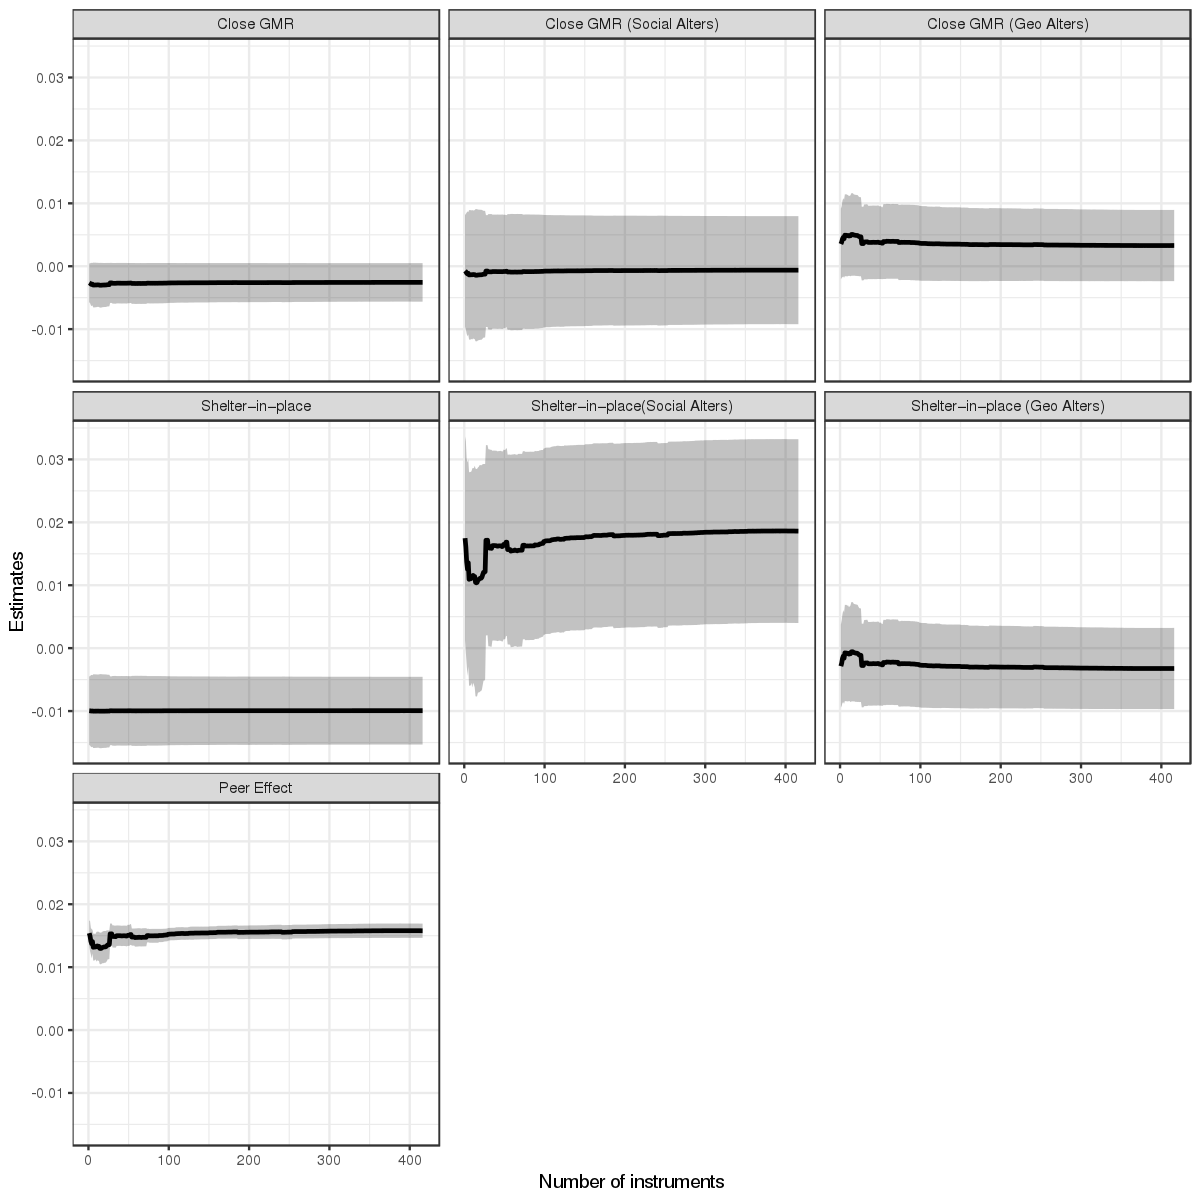

In [14]:
# load('/home/yiqunc/covid_fb_personal_folder/robustness_check_results/mod1_justCoefficients.RData')
# colnames(df1_coef)[ncol(df1_coef)] = 'peer.effect'
# colnames(df1_se)[ncol(df1_se)] = 'peer.effect'
df1_coef$no_iv = c(1:nrow(df1_coef))
df1_se$no_iv = c(1:nrow(df1_se))

df1_coef %>% select(`Close GMR`:no_iv) %>% mutate(`Peer Effect` = `Peer Effect`/100) %>%
    gather(var, coef, `Close GMR`:`Peer Effect`, factor_key=TRUE) -> plot_coef
df1_se %>% select(`Close GMR`:no_iv) %>% mutate(`Peer Effect` = `Peer Effect`/100) %>%
    gather(var, se, `Close GMR`:`Peer Effect`, factor_key=TRUE) -> plot_se
plot_df = plot_coef %>% left_join(plot_se, by = c('var', 'no_iv'))
# colnames(plot_df)
plot_df %>% mutate(lb = coef - 1.96*se, ub = coef + 1.96*se) %>% 
ggplot(., aes(x = no_iv, y = coef)) + 
    geom_ribbon(aes(ymin=lb,ymax=ub),alpha=0.3) +
    geom_line(size = 1) + facet_wrap(~var) + labs(x='Number of instruments', y = 'Estimates')
ggsave('~/covid_mobility/paper_code/output/RC_varying_iv_num.png')

In [ ]:
# # the remaining variables with 0 coefs

# for (i in (non_na_length+1):length(ordered_var_mod1)){
#     vars = ordered_var_mod1[1:i]
#     if (length(var)==1){
#      as.formula_formula = as.formula(paste0(first_part, vars, last_part))
#         temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
#     }
#     else {
#         iv_part = paste(vars, collapse = '+')
#         temp_formula = as.formula(paste0(first_part, vars, last_part))
#         temp_mod = felm(temp_formula, panel, weights = panel$n, keepCX = T)
#     }
#     sum.mod <- summarize.felm.fit.with.adj(temp_mod, conley.selector.matrix, panel$state_abbv)
#     df1_coef[i, ] = sum.mod$ct[,1]
#     df1_se[i,] = sum.mod$ct[,2]
#     temp_save_filename = paste0('/home/yiqunc/covid_fb_personal_folder/robustness_check_results/mod1_', i, '.rds')
#     saveRDS(sum.mod, file = temp_save_filename)
#     print(i)
# }

# save(df1_coef, df1_se, file = '/home/yiqunc/covid_fb_personal_folder/robustness_check_results/mod1_full.RData')

In [ ]:
# m1 <- felm(ash_rnstu.r ~ ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r | 
#             county_fips + ds | 
#             (ash_alter_rnstu.r ~ 
#              iv01 + iv02 + iv03 + iv04 + iv05 + iv06 + iv07 + iv08 + iv09 + iv10 +
#              iv11 + iv12 + iv13 + iv14 + iv15 + iv16 + iv17 + iv18 + iv19 + iv20 +
#              iv21 + iv22 + iv23 + iv24 + iv25 + iv26 + iv27 + iv28 + iv29 + iv30 +
#              iv31 + iv32 + iv33 + iv34 + iv35 + iv36 + iv37 + iv38 + iv39 + iv40 +
#              iv41 + iv42 + iv43 + iv44 + iv45 + iv46 + iv47 + iv48 + iv49 + iv50 +
#              iv51 + iv52 + iv53 + iv54 + iv55 + iv56 + iv57 + iv58 + iv59 + iv60 +
#              iv61 + iv62 + iv63 + iv64 + iv65 + iv66 + iv67 + iv68 + iv69 + iv70 +
#              iv71 + iv72 + iv73 + iv74 + iv75 + iv76 + iv77 + iv78 + iv79 + iv80 +
#              iv81 + iv82 + iv83 + iv84 + iv85 + iv86 + iv87 + iv88 + iv89 + iv90 +
#              iv91 + iv92 + iv93 + iv94) | state_abbv, panel, weights = panel$n, keepCX = T)

# # summary(fit)
# # print(condfstat(fit))
# sum.m1 <- summarize.felm.fit.with.adj(m1, conley.selector.matrix, panel$state_abbv)
# sum.m1$ct
# #sum.m1$wt

In [ ]:
# var_mod1 = apply(cvlasso$glmnet.fit$beta[[1]], 1, function(x) { cvlasso$glmnet.fit$lambda[min(which(x != 0))] }) 



In [ ]:
# iv_lasso_0.001 = names(var_mod1[!is.na(var_mod1) & var_mod1 > 0.001])
# print(iv_lasso_0.001)
# iv_lasso_0.001 = paste(iv_lasso_0.001, collapse = '+')
# iv_formula = as.formula(str_c('ash_alter_rnstu.r ~', iv_lasso_0.001))

In [ ]:
# # f1 = as.formula('iv01 + iv02 + iv03')
# # lm(ash_alter_rnstu.r ~ alter_btvrc_Xbg.r, data = panel)
# # felm(ash_rnstu.r ~ ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r | 
# #             county_fips + ds | 
# #             (ash_alter_rnstu.r ~ f1) | state_abbv, panel, weights = panel$n, keepCX = T)
# panel$na = NA

# f1 = as.formula('ash_alter_rnstu.r ~ alter_btvrc_Xbg.r')
# lm(f1, data = panel)
# felm(ash_rnstu.r ~ ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r + stay_home.r + alter_sh.r + geo_alter_sh.r |
#      0|ash_alter_rnstu.r ~ alter_btvrc_Xbgmr+sg_nhd.r+stay_home.r+fb_btvrc.r''fb_rnstu.r''device_count.r''non_home_cbg_visits_within_county.r'|state_abbv, panel, weights = panel$n)

In [ ]:
# iv_lasso_0.001 = names(var_mod1[!is.na(var_mod1) & var_mod1 > 0.001])
# print(iv_lasso_0.001)
# iv_lasso_0.001 = paste(iv_lasso_0.001, collapse = '+')
# f1 = as.formula(str_c('PRCP ~ 0 + ', iv_lasso_0.001))